In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
df = pd.read_csv('games0108.csv', sep=',')

In [6]:
df = df.drop('fortlfd', axis=1)

In [12]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalDiff,guestTotalGoalDiff,homeTeamGoalsDiffAtHome,homeTeamGoalsDiffAway,guestTeamGoalsDiffAtHome,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,result
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,lost
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,3.000000,0.0,0.0,0.0,3.0,0.0,3.0,lost
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,-3.000000,0.0,5.0,-3.0,0.0,3.0,0.0,won
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,4.333333,0.0,0.0,3.0,5.0,0.0,3.0,lost
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,0.000000,3.0,4.0,0.0,0.0,3.0,0.0,draw


In [11]:
df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [62]:
y_cat = (pd.get_dummies(df.result))
y_reg = df.resultNumeric

In [63]:
df.shape

(522, 18)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 17 columns):
contest                     509 non-null uint8
year                        509 non-null int64
month                       509 non-null int64
day                         509 non-null object
time                        509 non-null object
break                       509 non-null int64
hoamTeam                    509 non-null object
guestTeam                   509 non-null object
resultNumeric               509 non-null float64
homeTotalGoalDiff           509 non-null float64
guestTotalGoalDiff          509 non-null float64
homeTeamGoalsDiffAtHome     509 non-null float64
homeTeamGoalsDiffAway       509 non-null float64
guestTeamGoalsDiffAtHome    509 non-null float64
guestTeamGoalsDiffAway      509 non-null float64
hoamAvgPoints               509 non-null float64
guestAvgpoints              509 non-null float64
dtypes: float64(9), int64(3), object(4), uint8(1)
memory usage: 64.2+ KB


In [18]:
df.corr()['resultNumeric'].sort_values()

guestTotalGoalDiff         -0.215955
guestTeamGoalsDiffAway     -0.211635
guestTeamGoalsDiffAtHome   -0.172638
guestAvgpoints             -0.157949
break                      -0.082948
month                      -0.009726
year                        0.058273
homeTeamGoalsDiffAtHome     0.242608
homeTeamGoalsDiffAway       0.270778
homeTotalGoalDiff           0.313707
hoamAvgPoints               0.357243
resultNumeric               1.000000
Name: resultNumeric, dtype: float64

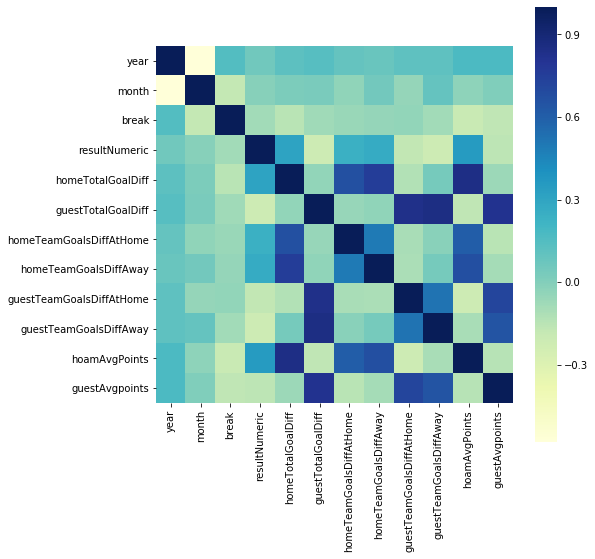

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")
plt.show()

In [25]:
X = df.drop(['resultNumeric', 'result', 'contest', 'hoamTeam', 'guestTeam', 'day', 'time'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=3)

In [117]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(11, 3)

In [118]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


In [119]:
model_1.compile(optimizer='adam', loss='mse')

In [120]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 1s 3ms/step - loss: 5.2451 - val_loss: 4.4817
Epoch 2/100
417/417 [==============================] - 0s 137us/step - loss: 4.9091 - val_loss: 4.2547
Epoch 3/100
417/417 [==============================] - 0s 132us/step - loss: 4.6725 - val_loss: 4.0924
Epoch 4/100
417/417 [==============================] - 0s 103us/step - loss: 4.4955 - val_loss: 3.9687
Epoch 5/100
417/417 [==============================] - 0s 151us/step - loss: 4.3684 - val_loss: 3.8748
Epoch 6/100
417/417 [==============================] - 0s 146us/step - loss: 4.2536 - val_loss: 3.7906
Epoch 7/100
417/417 [==============================] - 0s 118us/step - loss: 4.1713 - val_loss: 3.7175
Epoch 8/100
417/417 [==============================] - ETA: 0s - loss: 2.409 - 0s 132us/step - loss: 4.0919 - val_loss: 3.6491
Epoch 9/100
417/417 [==============================] - 0s 122us/step - loss: 4.0363 - val_loss: 3.6262
Epoch

Epoch 79/100
417/417 [==============================] - 0s 127us/step - loss: 3.4386 - val_loss: 3.5673
Epoch 80/100
417/417 [==============================] - 0s 96us/step - loss: 3.4370 - val_loss: 3.5756
Epoch 81/100
417/417 [==============================] - 0s 125us/step - loss: 3.4329 - val_loss: 3.5414
Epoch 82/100
417/417 [==============================] - 0s 101us/step - loss: 3.4245 - val_loss: 3.5439
Epoch 83/100
417/417 [==============================] - 0s 139us/step - loss: 3.4216 - val_loss: 3.5429
Epoch 84/100
417/417 [==============================] - 0s 122us/step - loss: 3.4185 - val_loss: 3.5480
Epoch 85/100
417/417 [==============================] - 0s 120us/step - loss: 3.4154 - val_loss: 3.5491
Epoch 86/100
417/417 [==============================] - ETA: 0s - loss: 3.358 - 0s 175us/step - loss: 3.4125 - val_loss: 3.5491
Epoch 87/100
417/417 [==============================] - 0s 120us/step - loss: 3.4064 - val_loss: 3.5435
Epoch 88/100
417/417 [===================

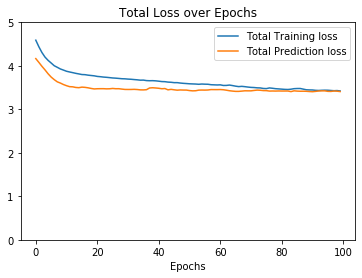

In [39]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8602470661835901

In [42]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

107.3883622945205

In [50]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [51]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [52]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [73]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6345 - Regression_loss: 4.5707 - Classification_loss: 1.0638 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 46430.6086 - val_Regression_loss: 46425.1006 - val_Classification_loss: 5.5077 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3333
Epoch 2/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6328 - Regression_loss: 4.5692 - Classification_loss: 1.0636 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 44929.2608 - val_Regression_loss: 44923.9915 - val_Classification_loss: 5.2690 - val_Regression_acc: 0.0095 - val_Classification_acc: 0.3333
Epoch 3/50
417/417 [==============================] - 2s 5ms/step - loss: 5.6339 - Regression_loss: 4.5702 - Classification_loss: 1.0637 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 46439.4985 - val_Regression_loss: 46433.8146 - val_Classifi

In [74]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [75]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [76]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [77]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 11)                132       
_________________________________________________________________
batch_normalization_3 (Batch (None, 11)                44        
_________________________________________________________________
hidden_2 (Dense)             (None, 11)                132       
_________________________________________________________________
Regression (Dense)           (None, 1)                 12        
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 326
Trainable params: 304
Non-trainable params: 22
_________________________________________________________________


In [116]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6406 - Regression_loss: 4.5722 - Classification_loss: 1.0685 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 99.4341 - val_Regression_loss: 95.8134 - val_Classification_loss: 3.6207 - val_Regression_acc: 0.0190 - val_Classification_acc: 0.3619
Epoch 2/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6385 - Regression_loss: 4.5714 - Classification_loss: 1.0671 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 108.0471 - val_Regression_loss: 104.1630 - val_Classification_loss: 3.8841 - val_Regression_acc: 0.0095 - val_Classification_acc: 0.3619
Epoch 3/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6367 - Regression_loss: 4.5706 - Classification_loss: 1.0661 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 87.9451 - val_Regression_loss: 84.5250 - val_Classification_loss: 3.42

Epoch 25/100
417/417 [==============================] - 2s 4ms/step - loss: 5.6338 - Regression_loss: 4.5703 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 100.7071 - val_Regression_loss: 97.0665 - val_Classification_loss: 3.6406 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.3619
Epoch 26/100
417/417 [==============================] - 2s 6ms/step - loss: 5.6338 - Regression_loss: 4.5703 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 91.3759 - val_Regression_loss: 87.9556 - val_Classification_loss: 3.4203 - val_Regression_acc: 0.0571 - val_Classification_acc: 0.3429
Epoch 27/100
417/417 [==============================] - 2s 5ms/step - loss: 5.6332 - Regression_loss: 4.5697 - Classification_loss: 1.0635 - Regression_acc: 0.2158 - Classification_acc: 0.4197 - val_loss: 105.4609 - val_Regression_loss: 101.7468 - val_Classification_loss: 3.7141 - val_Regression_acc: 0.0286 - val_Clas

KeyboardInterrupt: 

In [96]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-14.279012,
 array([7.9136825e-01, 1.4901161e-07, 9.9989313e-01], dtype=float32))

In [126]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [127]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [128]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [129]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 11)                0         
_________________________________________________________________
hidden_1 (Dense)             (None, 22)                264       
_________________________________________________________________
Regression (Dense)           (None, 1)                 23        
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [130]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 417 samples, validate on 105 samples
Epoch 1/50
417/417 [==============================] - 3s 8ms/step - loss: 5.0738 - Regression_loss: 4.0332 - Classification_loss: 1.0406 - Regression_acc: 0.2302 - Classification_acc: 0.4988 - val_loss: 4.9381 - val_Regression_loss: 3.9009 - val_Classification_loss: 1.0371 - val_Regression_acc: 0.1619 - val_Classification_acc: 0.5143
Epoch 2/50
417/417 [==============================] - 2s 4ms/step - loss: 4.8580 - Regression_loss: 3.8409 - Classification_loss: 1.0172 - Regression_acc: 0.2422 - Classification_acc: 0.5084 - val_loss: 4.8033 - val_Regression_loss: 3.7764 - val_Classification_loss: 1.0269 - val_Regression_acc: 0.1714 - val_Classification_acc: 0.5048
Epoch 3/50
417/417 [==============================] - 2s 4ms/step - loss: 4.7269 - Regression_loss: 3.7227 - Classification_loss: 1.0042 - Regression_acc: 0.2278 - Classification_acc: 0.5132 - val_loss: 4.7503 - val_Regression_loss: 3.7252 - val_Classification_loss: 1.0252 - val_Re

417/417 [==============================] - 2s 4ms/step - loss: 4.1825 - Regression_loss: 3.2506 - Classification_loss: 0.9319 - Regression_acc: 0.2710 - Classification_acc: 0.5635 - val_loss: 4.7913 - val_Regression_loss: 3.7818 - val_Classification_loss: 1.0095 - val_Regression_acc: 0.1714 - val_Classification_acc: 0.5429
Epoch 26/50
417/417 [==============================] - 2s 4ms/step - loss: 4.1288 - Regression_loss: 3.1983 - Classification_loss: 0.9305 - Regression_acc: 0.2638 - Classification_acc: 0.5683 - val_loss: 4.7495 - val_Regression_loss: 3.7431 - val_Classification_loss: 1.0064 - val_Regression_acc: 0.1810 - val_Classification_acc: 0.5048
Epoch 27/50
417/417 [==============================] - 2s 4ms/step - loss: 4.1389 - Regression_loss: 3.2113 - Classification_loss: 0.9276 - Regression_acc: 0.2662 - Classification_acc: 0.5588 - val_loss: 4.7353 - val_Regression_loss: 3.7304 - val_Classification_loss: 1.0049 - val_Regression_acc: 0.1524 - val_Classification_acc: 0.5143
E

417/417 [==============================] - 2s 4ms/step - loss: 3.8834 - Regression_loss: 2.9855 - Classification_loss: 0.8979 - Regression_acc: 0.2542 - Classification_acc: 0.5971 - val_loss: 4.6771 - val_Regression_loss: 3.6622 - val_Classification_loss: 1.0149 - val_Regression_acc: 0.1524 - val_Classification_acc: 0.5524
Epoch 50/50
417/417 [==============================] - 2s 4ms/step - loss: 3.9093 - Regression_loss: 3.0069 - Classification_loss: 0.9024 - Regression_acc: 0.2614 - Classification_acc: 0.5875 - val_loss: 4.7049 - val_Regression_loss: 3.6830 - val_Classification_loss: 1.0219 - val_Regression_acc: 0.1524 - val_Classification_acc: 0.5429


In [103]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(-14.279012,
 array([7.9136825e-01, 1.4901161e-07, 9.9989313e-01], dtype=float32))

In [104]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(-0.0048826337, array([0.3286624 , 0.5263461 , 0.55613184], dtype=float32))

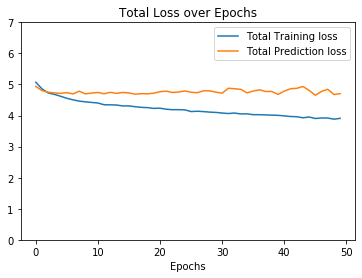

In [131]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

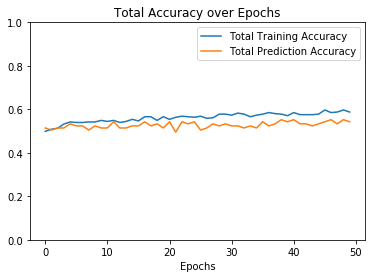

In [132]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])